# Analyze Hyperparameter Tuning


In [55]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
# FILENAME = "f_KNN_MUTAG_TEST_2024-06-26_15-52-52_results.csv"

In [56]:

filepath_MUTAG= "files/results/Hyperparameter_tuning_results/HP_20251121_SVC_Trivial-GED_precomputed_MUTAG_1_.xlsx"
filepath_PTC_FR ="files/results/Hyperparameter_tuning_results/HP_20251121_SVC_Trivial-GED_precomputed_BZR_MD_1_.xlsx"
filepath_KKI = "files/results/Hyperparameter_tuning_results/HP_20251121_SVC_Trivial-GED_precomputed_KKI_1_.xlsx"
filepath_MSRC_9 ="files/results/Hyperparameter_tuning_results/HP_20251121_SVC_Trivial-GED_precomputed_MSRC_9_1_.xlsx"
filepath_IMDB_MULTI ="files/results/Hyperparameter_tuning_results/HP_20251114_SVC_Trivial-GED_precomputed_IMDB-MULTI.xlsx"
filepath_BZR_MD ="files/results/Hyperparameter_tuning_results/HP_20251121_SVC_Trivial-GED_precomputed_BZR_MD_1_.xlsx"

Model_Name = "SVC-Trivial-GED"

In [57]:
filepath= filepath_IMDB_MULTI
filepaths = [filepath_MUTAG, filepath_PTC_FR, filepath_KKI, filepath_MSRC_9, filepath_IMDB_MULTI, filepath_BZR_MD]
filepaths_names = ["MUTAG","PTC_FR","KKI", "MSRC_9", "IMDB_MULTI", "BZR_MD"]

# # find the file in the directory
# filepath = None
# for root, dirs, files in os.walk("."):
#     if FILENAME in files:
#         filepath = os.path.join(root, FILENAME)
#         break


In [58]:
hyper_df = pd.read_excel(filepath)
display(len(hyper_df))
display(hyper_df.head(10))
datasets_multiple = []
for filepath in filepaths:
    hyper_df_temp = pd.read_excel(filepath)
    datasets_multiple.append(hyper_df_temp)


1500

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel_type,param_llambda,param_similarity_function,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
0,1.241813,0.179123,0.624195,0.190594,3.401836,balanced,precomputed,0.192586,k3,"{'C': 3.401836362208285, 'class_weight': 'bala...",0.120833,0.420833,0.525000,0.525000,0.429167,0.404167,0.148581,46,0
1,2.134619,0.057559,0.974539,0.023622,0.005237,NaN,precomputed,1.155742,k4,"{'C': 0.005236850997643348, 'class_weight': No...",0.104167,0.441667,0.487500,0.508333,0.425000,0.393333,0.147681,71,0
2,1.500565,0.007814,0.686049,0.000749,0.001011,NaN,precomputed,0.054552,k1,"{'C': 0.0010114563978107782, 'class_weight': N...",0.058333,0.441667,0.375000,0.095833,0.000000,0.194167,0.178761,87,0
3,1.529255,0.016616,0.681802,0.002900,0.003858,balanced,precomputed,0.053744,k1,"{'C': 0.0038584128686403414, 'class_weight': '...",0.058333,0.141667,0.375000,0.095833,0.000000,0.134167,0.129056,99,0
4,1.445145,0.009902,0.643427,0.004409,0.005380,NaN,precomputed,37.664708,k2,"{'C': 0.005379851169671417, 'class_weight': No...",0.329167,0.425000,0.591667,0.562500,0.504167,0.482500,0.095503,13,0
5,2.135770,0.040865,0.985382,0.003100,0.002558,NaN,precomputed,0.010301,k4,"{'C': 0.002557653244892925, 'class_weight': No...",0.275000,0.370833,0.600000,0.658333,0.600000,0.500833,0.149917,1,0
6,1.449081,0.021465,0.644971,0.004686,3.986239,NaN,precomputed,0.027615,k2,"{'C': 3.986239211774516, 'class_weight': None,...",0.325000,0.391667,0.558333,0.625000,0.533333,0.486667,0.111006,9,0
7,2.168274,0.049803,0.998007,0.015432,0.000702,balanced,precomputed,0.311883,k3,"{'C': 0.0007023888794564408, 'class_weight': '...",0.112500,0.425000,0.516667,0.512500,0.429167,0.399167,0.148591,48,0
8,1.535953,0.009143,0.681692,0.003269,0.001510,NaN,precomputed,18.884143,k1,"{'C': 0.0015100173905835935, 'class_weight': N...",0.208333,0.245833,0.375000,0.095833,0.000000,0.185000,0.128469,95,0
9,2.182754,0.050170,1.012348,0.029976,7.832608,NaN,precomputed,16.021271,k4,"{'C': 7.832607620344547, 'class_weight': None,...",0.100000,0.454167,0.491667,0.504167,0.425000,0.395000,0.150125,51,0


In [59]:
results_column ="mean_test_score"

In [60]:
# a function that gets two column names form the df, one result column, which represents the score, and one regarding a certain hyperparameter.
# this second parameter, can be categorical or numerical.
# if its categorical, i want a box plot, plotting the mean and max score for each category
# if its numerical, i want a scatter plot, plotting the score against the hyperparameter value
def plot_hyperparameter_effect(dfs, dataset_Names, hyperparameter_column, results_column, Model_Name, dataset_labels=None):
    """
    dfs: a single DataFrame or a list of DataFrames (same columns, different datasets)
    hyperparameter_column: name of hyperparameter column to plot
    results_column: name of score column
    Model_Name: model name for titles
    dataset_labels: optional list of labels for the datasets (same length as dfs)
    """
    # allow passing a single DataFrame
    if not isinstance(dfs, (list, tuple)):
        dfs = [dfs]
    n = len(dfs)
    if dataset_labels is None:
        dataset_labels = [filepaths_names[i] for i in range(n)]
    # validate labels length
    if len(dataset_labels) != n:
        dataset_labels = [filepaths_names[i] for i in range(n)]

    # check columns presence
    for i, df in enumerate(dfs):
        if hyperparameter_column not in df.columns:
            print(f"[skip] Column '{hyperparameter_column}' not found in {dataset_Names[i]}: {dataset_labels[i]}")
            return
        if results_column not in df.columns:
            print(f"[skip] Column '{results_column}' not found in {dataset_Names[i]}: {dataset_labels[i]}")
            return
        # replace all NaN in hyperparameter column with string 'None' for categorical plotting
        if pd.api.types.is_object_dtype(df[hyperparameter_column]) or pd.api.types.is_categorical_dtype(df[hyperparameter_column]):
            df[hyperparameter_column] = df[hyperparameter_column].fillna('None')

    # compute global y-limits for comparability
    all_scores = pd.concat([df[results_column] for df in dfs], ignore_index=True)
    ymin, ymax = all_scores.min(), all_scores.max()
    ypad = (ymax - ymin) * 0.05 if ymax > ymin else 0.01
    ylims = (ymin - ypad, ymax + ypad)

    # prepare subplots (one row)
    fig, axes = plt.subplots(1, n, figsize=(6 * max(1, n), 7), squeeze=False)
    axes = axes[0]

    palette = sns.color_palette("tab10", n)

    for i, (df, label) in enumerate(zip(dfs, dataset_labels)):
        ax = axes[i]
        ax.set_title(f"{Model_Name} — {label}")
        ax.set_ylabel(results_column)
        ax.set_xlabel(hyperparameter_column)
        ax.set_ylim(ylims)

        if pd.api.types.is_numeric_dtype(df[hyperparameter_column]):
            # numeric: scatter + trend line
            sns.scatterplot(data=df, x=hyperparameter_column, y=results_column,
                            ax=ax, color=palette[i], alpha=0.6, edgecolor=None)
            # trend (robust fit via lowess if many points)
            try:
                sns.regplot(data=df, x=hyperparameter_column, y=results_column,
                            ax=ax, scatter=False, color='black', line_kws={'lw':1.5}, ci=None)
            except Exception:
                pass
            ax.grid(True)
        else:
            # categorical: violin + overlay mean and max
            # sort categories for consistent ordering across datasets
            categories = sorted(df[hyperparameter_column].unique(), key=lambda x: str(x))
            for cat in categories:
                if cat is None or pd.isna(cat):
                    print(f"Replacing NaN/None category with 'None' string in dataset: {label}")
                    df[hyperparameter_column] = df[hyperparameter_column].replace({cat: 'None'})
                    df[hyperparameter_column] = df[hyperparameter_column].astype(str)
                    cat = 'None'
            sns.violinplot(data=df, x=hyperparameter_column, y=results_column, order=categories,
                           inner="box", ax=ax, color=palette[i], cut=0)
            summary_df = df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
            # ensure same order
            summary_df[hyperparameter_column] = pd.Categorical(summary_df[hyperparameter_column], categories=categories, ordered=True)
            summary_df = summary_df.sort_values(by=hyperparameter_column)
            sns.scatterplot(data=summary_df, x=hyperparameter_column, y="mean", ax=ax,
                            color='white', edgecolor='blue', s=100, marker='o', label='Mean', zorder=10)
            sns.scatterplot(data=summary_df, x=hyperparameter_column, y="max", ax=ax,
                            color='yellow', edgecolor='red', s=100, marker='X', label='Max', zorder=11)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.grid(axis='y')

        # small legend handling: only categorical case has labels from overlays
        if i == 0 and ax.get_legend() is not None:
            ax.legend(loc='upper right')
        else:
            # remove duplicate legends
            if ax.get_legend() is not None:
                ax.get_legend().remove()

    plt.tight_layout()
    plt.show()
    return fig, axes

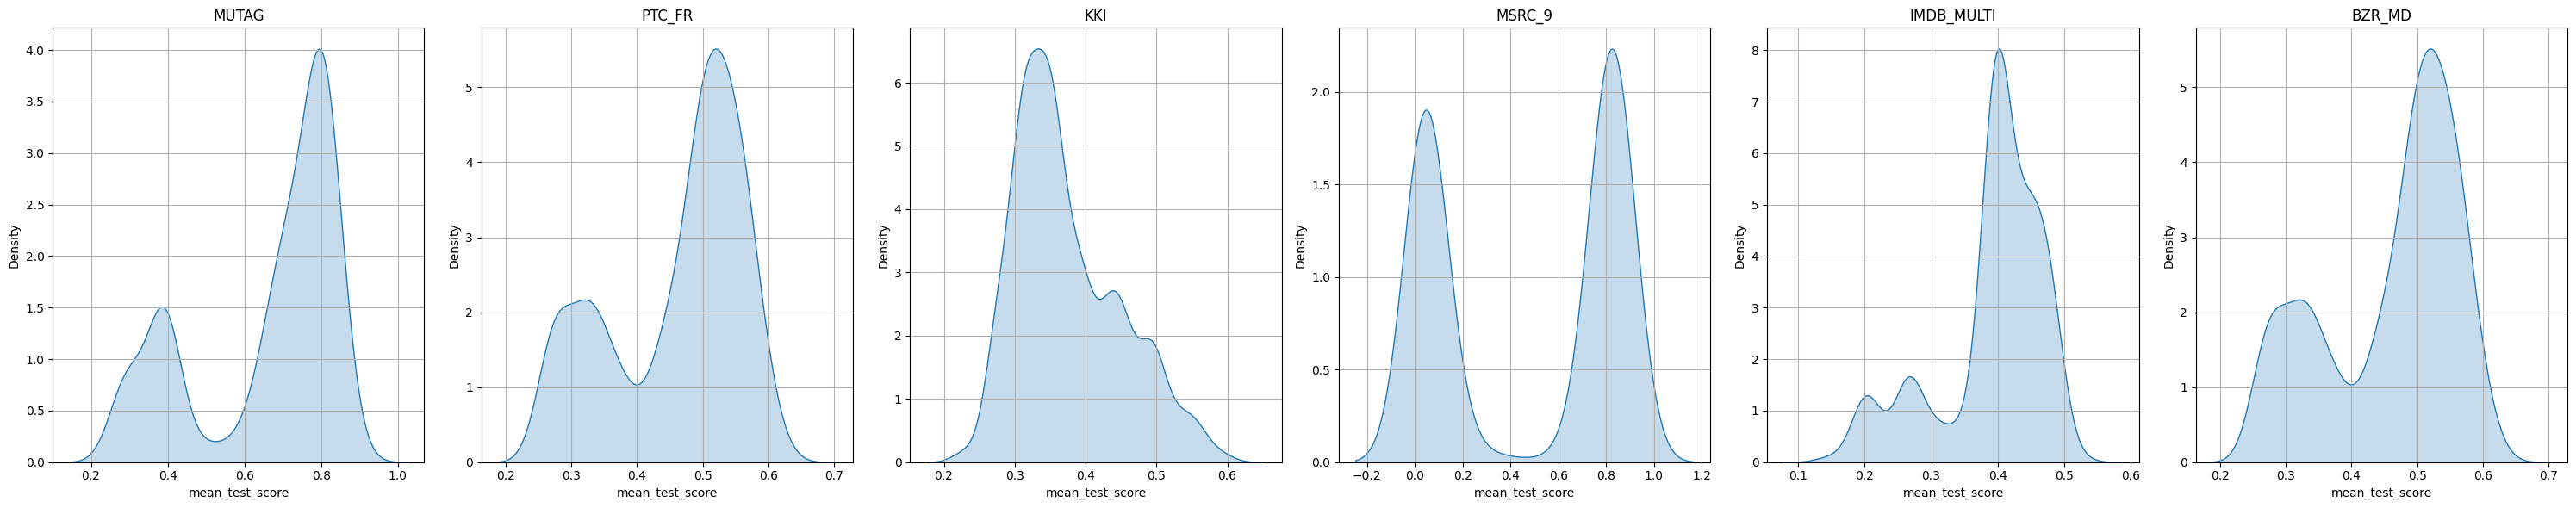

In [61]:
# density plot of results column for all datasets side-by-side
dfs = datasets_multiple  # created in a previous cell
labels = filepaths_names if 'filepaths_names' in globals() else [f"Dataset {i+1}" for i in range(len(dfs))]

n = len(dfs)
fig, axes = plt.subplots(1, n, figsize=(5 * max(1, n), 6), squeeze=False)
axes = axes[0]

for i, (df, label) in enumerate(zip(dfs, labels)):
    ax = axes[i]
    ax.set_title(label)
    if results_column in df.columns:
        sns.kdeplot(data=df, x=results_column, fill=True, ax=ax)
        ax.set_xlabel(results_column)
        ax.set_ylabel("Density")
    else:
        ax.text(0.5, 0.5, f"'{results_column}' not found", ha='center', va='center')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [62]:
# give for the top 50 scoring hyperparameter settings, the mean of all hyperparameters
top_50_df = hyper_df.nlargest(50, results_column)
display(top_50_df.describe())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_llambda,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,1.536623,0.017722,0.699337,0.006397,1.196652,2.042030,0.388333,0.372167,0.589583,0.586167,0.554167,0.498083,0.124859,5.060000,5.94000
std,0.491554,0.036762,0.234919,0.020029,2.102916,7.823540,0.162643,0.031265,0.078757,0.036552,0.050836,0.010700,0.033409,4.037629,3.74934
min,0.757758,0.001797,0.331452,0.000316,0.000681,0.010101,0.266667,0.316667,0.329167,0.508333,0.412500,0.488333,0.080579,1.000000,0.00000
25%,1.151143,0.004606,0.524182,0.001483,0.006729,0.012065,0.309375,0.350000,0.588542,0.562500,0.539583,0.490833,0.097786,2.000000,4.00000
50%,1.449024,0.007074,0.644816,0.002476,0.052827,0.025597,0.345833,0.370833,0.606250,0.589583,0.566667,0.494167,0.126010,3.000000,5.50000
75%,2.094816,0.015392,0.976694,0.003595,1.709461,0.639703,0.390625,0.395833,0.633333,0.612500,0.583333,0.500833,0.142539,8.000000,8.00000
max,2.251197,0.257620,1.035471,0.143000,9.493440,53.151325,0.929167,0.429167,0.654167,0.658333,0.608333,0.531667,0.210033,15.000000,14.00000


In [63]:
# fucntion to calculate correlation coeffizcent between numerical hyperparameters and results column
def calculate_correlation(dfs, relevant_columns, results_column, dataset_labels=None):
    """
    Berechnet für jede numerische Hyperparameter-Spalte die Korrelationskoeffizienten
    (Pearson) zwischen dieser Spalte und results_column für alle übergebenen DataFrames.
    Rückgabe: DataFrame mit Hyperparametern als Index und je einer Spalte pro Dataset.
    """
    # allow single DataFrame or list
    if not isinstance(dfs, (list, tuple)):
        dfs = [dfs]
    n = len(dfs)

    # determine dataset labels
    if dataset_labels is None:
        if 'filepaths_names' in globals() and len(filepaths_names) == n:
            dataset_labels = filepaths_names
        else:
            dataset_labels = [f"Dataset_{i+1}" for i in range(n)]
    elif len(dataset_labels) != n:
        dataset_labels = [f"Dataset_{i+1}" for i in range(n)]

    rows = []
    index = []

    for col in relevant_columns:
        if col == results_column:
            continue

        # build a list of correlations (one per dataset); use NaN when not applicable
        corrs = []
        any_numeric = False
        for df in dfs:
            if col not in df.columns or results_column not in df.columns:
                corrs.append(np.nan)
                continue
            if not pd.api.types.is_numeric_dtype(df[col]):
                corrs.append(np.nan)
                continue
            # numeric -> compute correlation (safely)
            try:
                corr = df[col].corr(df[results_column])
            except Exception:
                corr = np.nan
            corrs.append(corr)
            if not pd.isna(corr):
                any_numeric = True

        # include the hyperparameter only if it was numeric in at least one dataset
        if any_numeric:
            index.append(col)
            rows.append(corrs)

    corr_df = pd.DataFrame(rows, index=index, columns=dataset_labels)
    return corr_df

# fuction to get the average scores in the results column and their 95% confidence intervall for all possibilities of a discrete hyperparameter
# works with a single DataFrame or a list of DataFrames (aggregates across datasets)
def get_parameter_avergae(dfs, relevant_colmns, results_column):
    """
    dfs: single DataFrame or list of DataFrames
    relevant_colmns: iterable of column names to evaluate
    results_column: name of score column
    Returns: dict {hyperparameter: {value: (mean, 95%_conf_interval)}}
    """
    # allow single DataFrame
    if not isinstance(dfs, (list, tuple)):
        dfs = [dfs]

    difference_dict: dict = dict()
    for column in relevant_colmns:
        if column == results_column:
            continue
        # skip numeric columns (we only compute discrete/categorical summaries)
        # treat object/ categorical types as discrete
        # if column missing in all dfs, skip
        if not any(column in df.columns for df in dfs):
            continue
        # detect if column is numeric in all dfs; if so skip
        all_numeric = all((column in df.columns and pd.api.types.is_numeric_dtype(df[column])) for df in dfs)
        if all_numeric:
            continue

        # gather unique values across all datasets (stable ordering)
        vals = []
        for df in dfs:
            if column in df.columns:
                vals.extend(df[column].dropna().unique().tolist())
        values = sorted(set(vals), key=lambda x: str(x))

        avg_dict: dict = dict()
        for value in values:
            # collect results from all datasets for this value
            parts = []
            for df in dfs:
                if column in df.columns and results_column in df.columns:
                    subset = df[df[column] == value][results_column]
                    if len(subset):
                        parts.append(subset)
            if parts:
                combined = pd.concat(parts, ignore_index=True)
                n = len(combined)
                mean = combined.mean()
                if n > 1:
                    conf_int = 1.96 * combined.std(ddof=1) / np.sqrt(n)  # 95% CI
                else:
                    conf_int = 0.0
            else:
                mean = np.nan
                conf_int = np.nan
            avg_dict[value] = (mean, conf_int)
        difference_dict[column] = avg_dict
    return difference_dict

,Hyperparameter,MUTAG,PTC_FR,KKI,MSRC_9,IMDB_MULTI,BZR_MD,Mean_Correlation,Mean_Absolute_Correlation
0,param_llambda,-0.370738,-0.156345,0.014564,-0.092112,-0.079058,-0.156345,-0.140005,0.144167
1,param_C,-0.018814,0.045310,0.003882,0.025181,-0.018283,0.045310,0.013764,0.024364
2,fold_index,0.022347,0.010557,0.019442,-0.012942,0.011619,0.010557,0.010263,0.013961


Hyperparameter: param_class_weight
  Value: balanced => Mean: 0.4704, 95% CI: ±0.0062

Hyperparameter: param_kernel_type
  Value: precomputed => Mean: 0.4692, 95% CI: ±0.0043

Hyperparameter: param_similarity_function
  Value: k1 => Mean: 0.5469, 95% CI: ±0.0073
  Value: k2 => Mean: 0.5904, 95% CI: ±0.0073
  Value: k3 => Mean: 0.3601, 95% CI: ±0.0078
  Value: k4 => Mean: 0.3800, 95% CI: ±0.0080



/tmp/ipykernel_236330/3183085584.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_object_dtype(df[hyperparameter_column]) or pd.api.types.is_categorical_dtype(df[hyperparameter_column]):


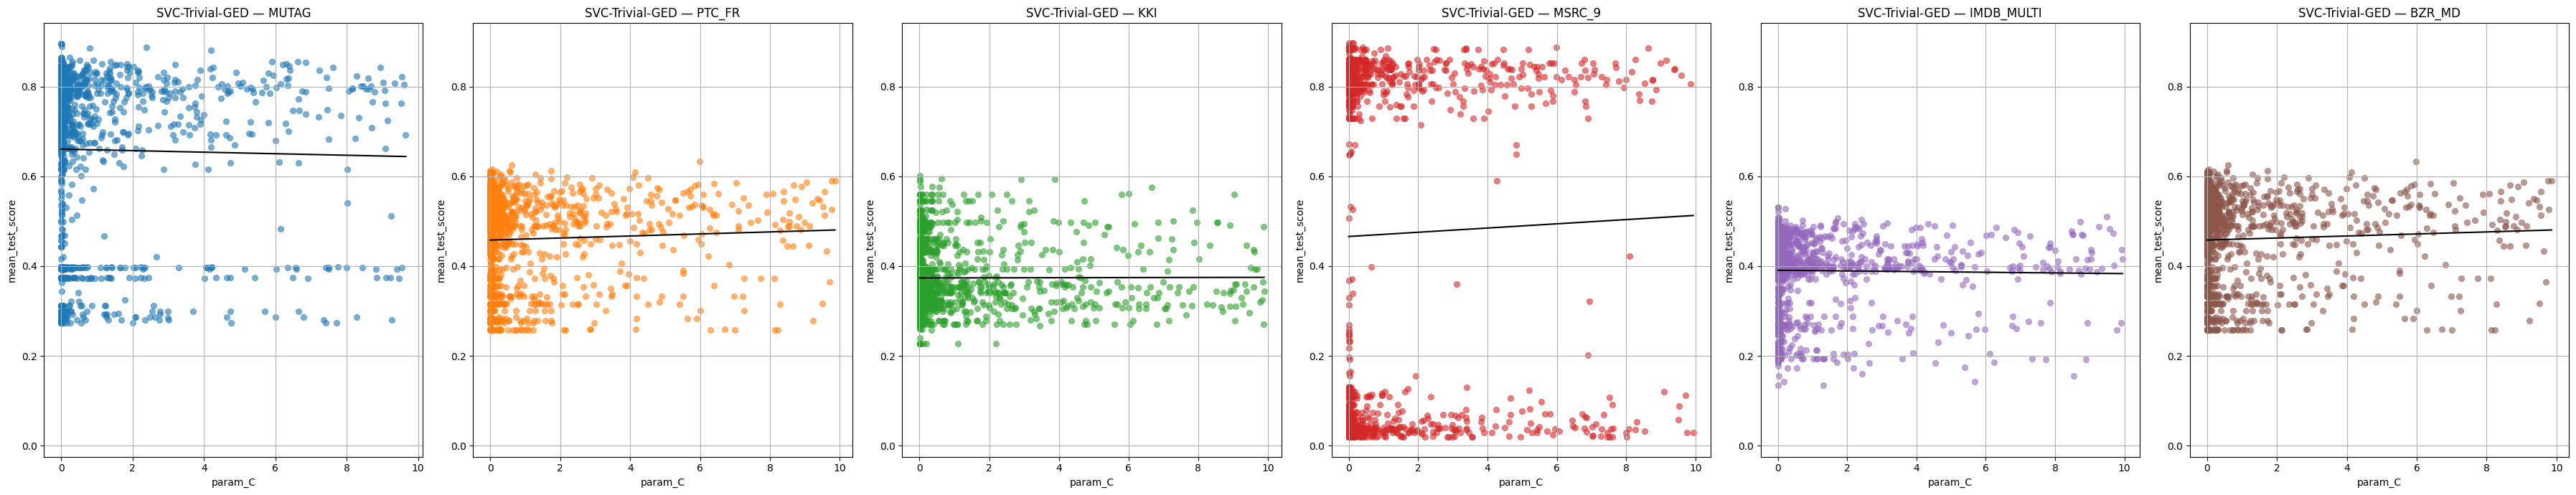

/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set

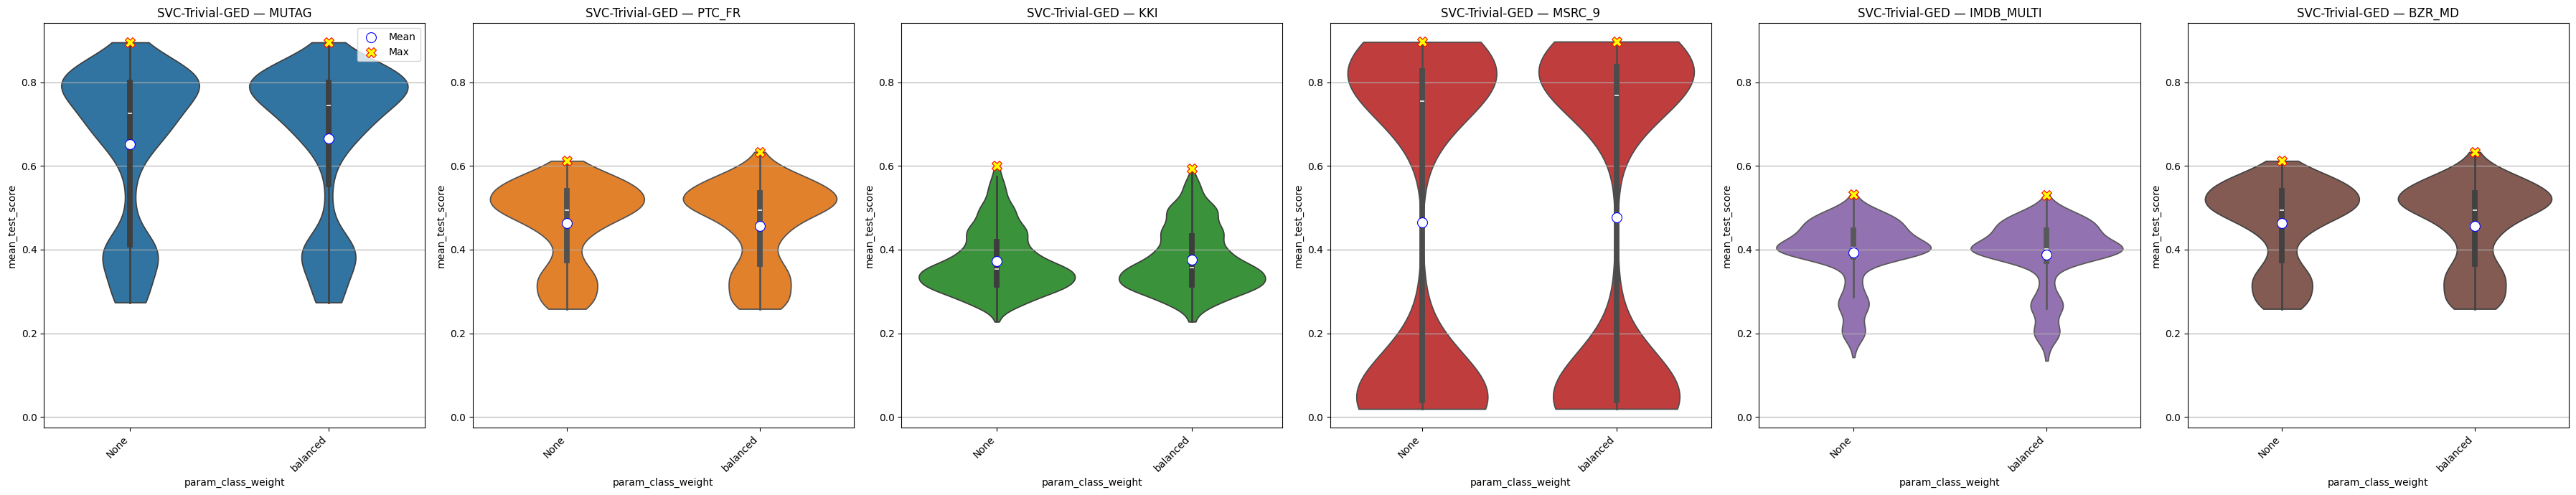

/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set

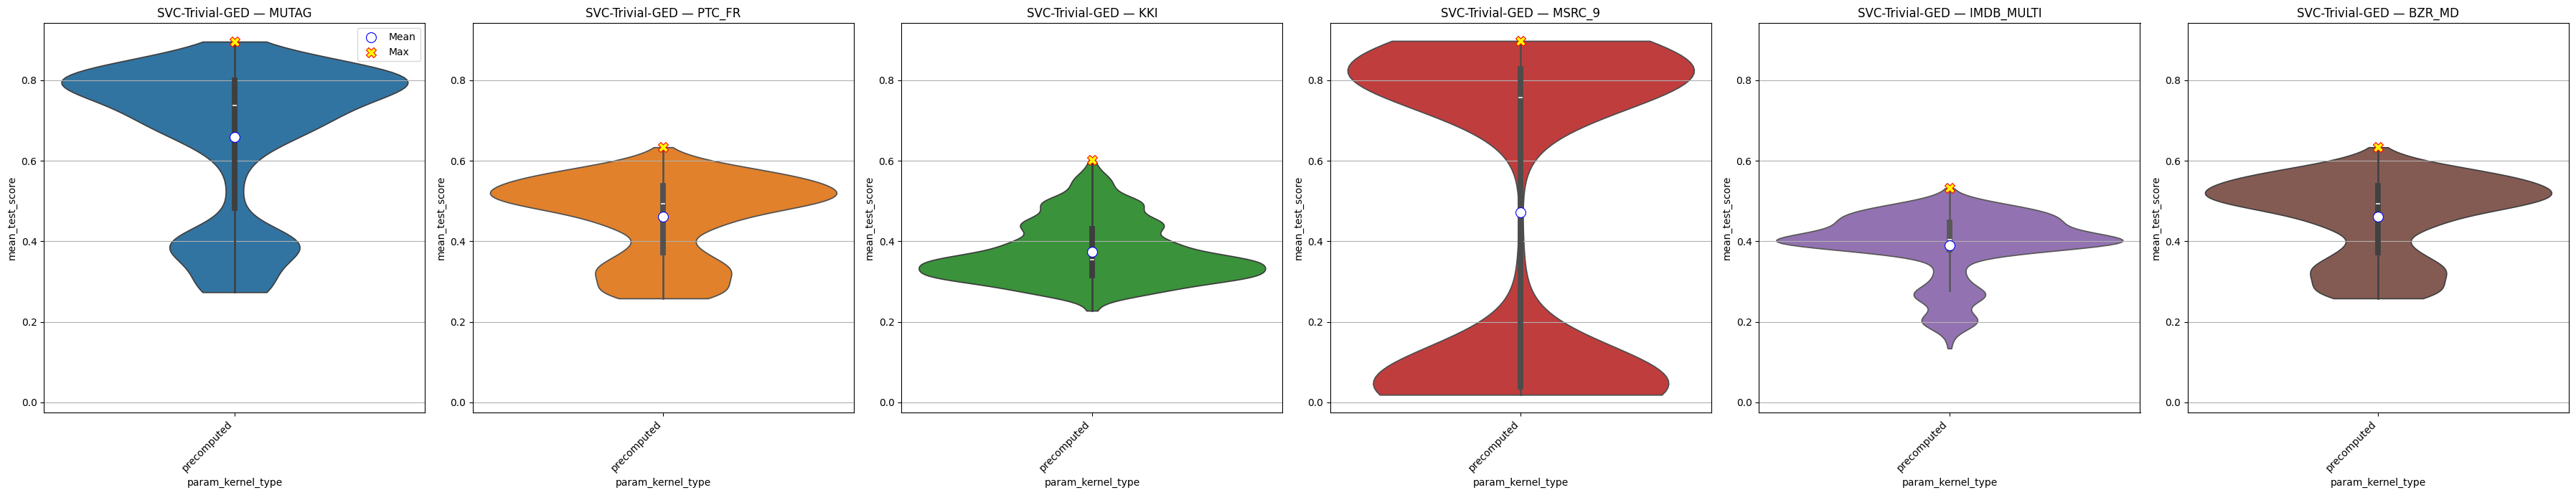

/tmp/ipykernel_236330/3183085584.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_object_dtype(df[hyperparameter_column]) or pd.api.types.is_categorical_dtype(df[hyperparameter_column]):


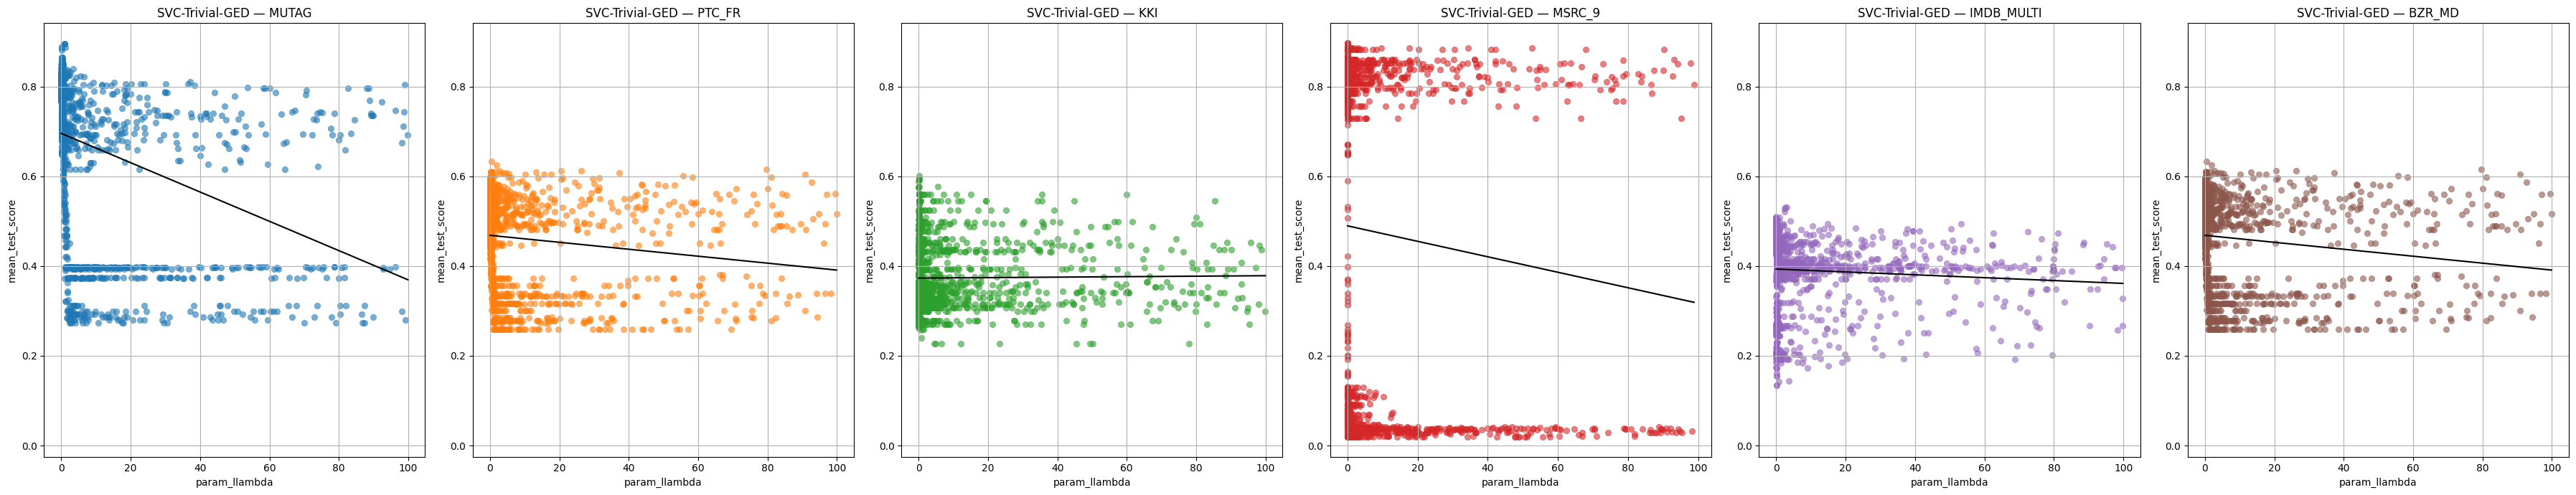

/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_236330/3183085584.py:85: UserWarning: set

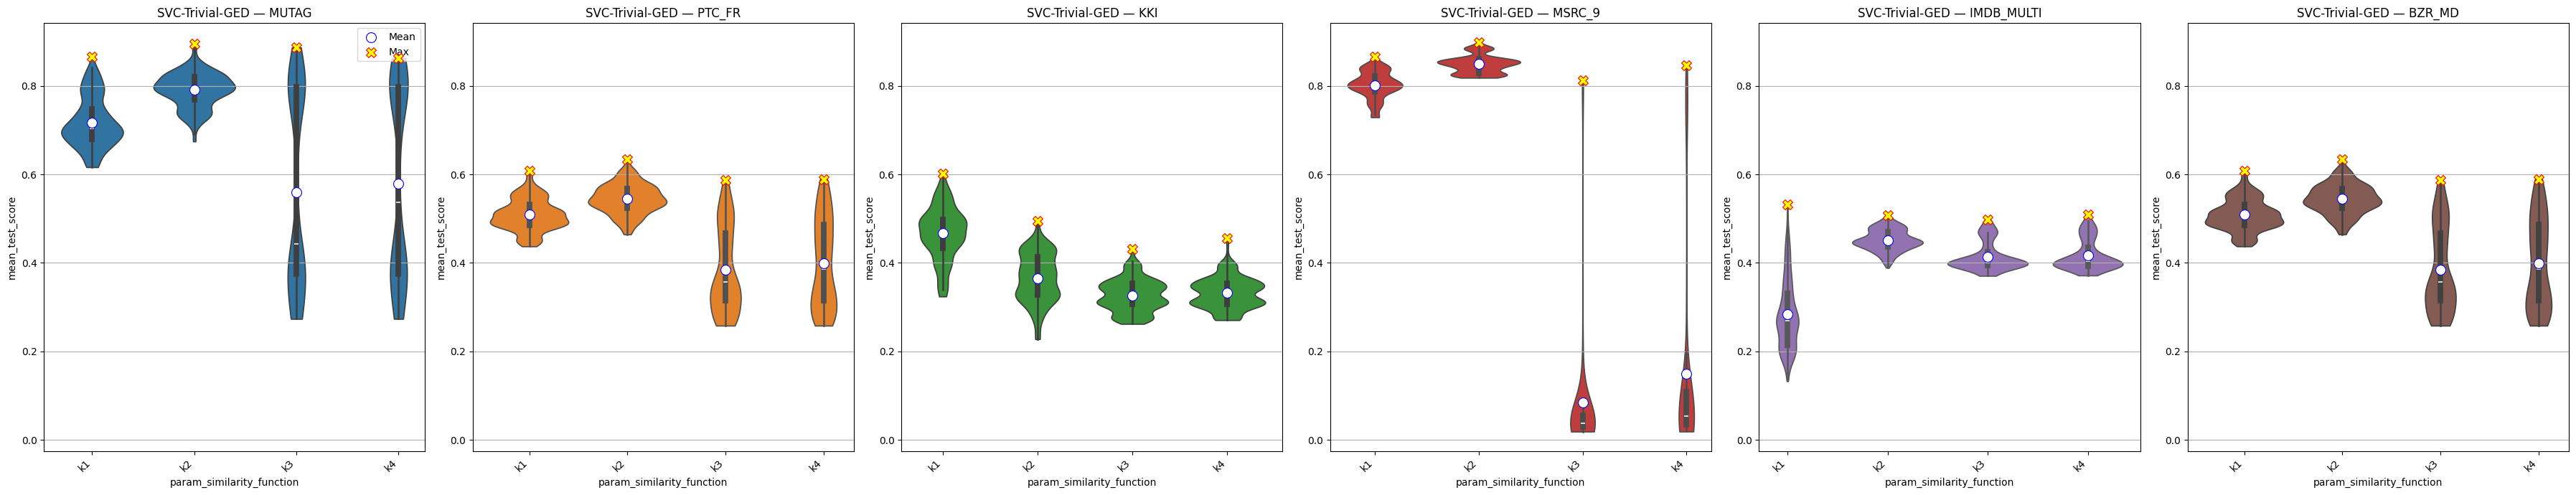

/tmp/ipykernel_236330/3183085584.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_object_dtype(df[hyperparameter_column]) or pd.api.types.is_categorical_dtype(df[hyperparameter_column]):


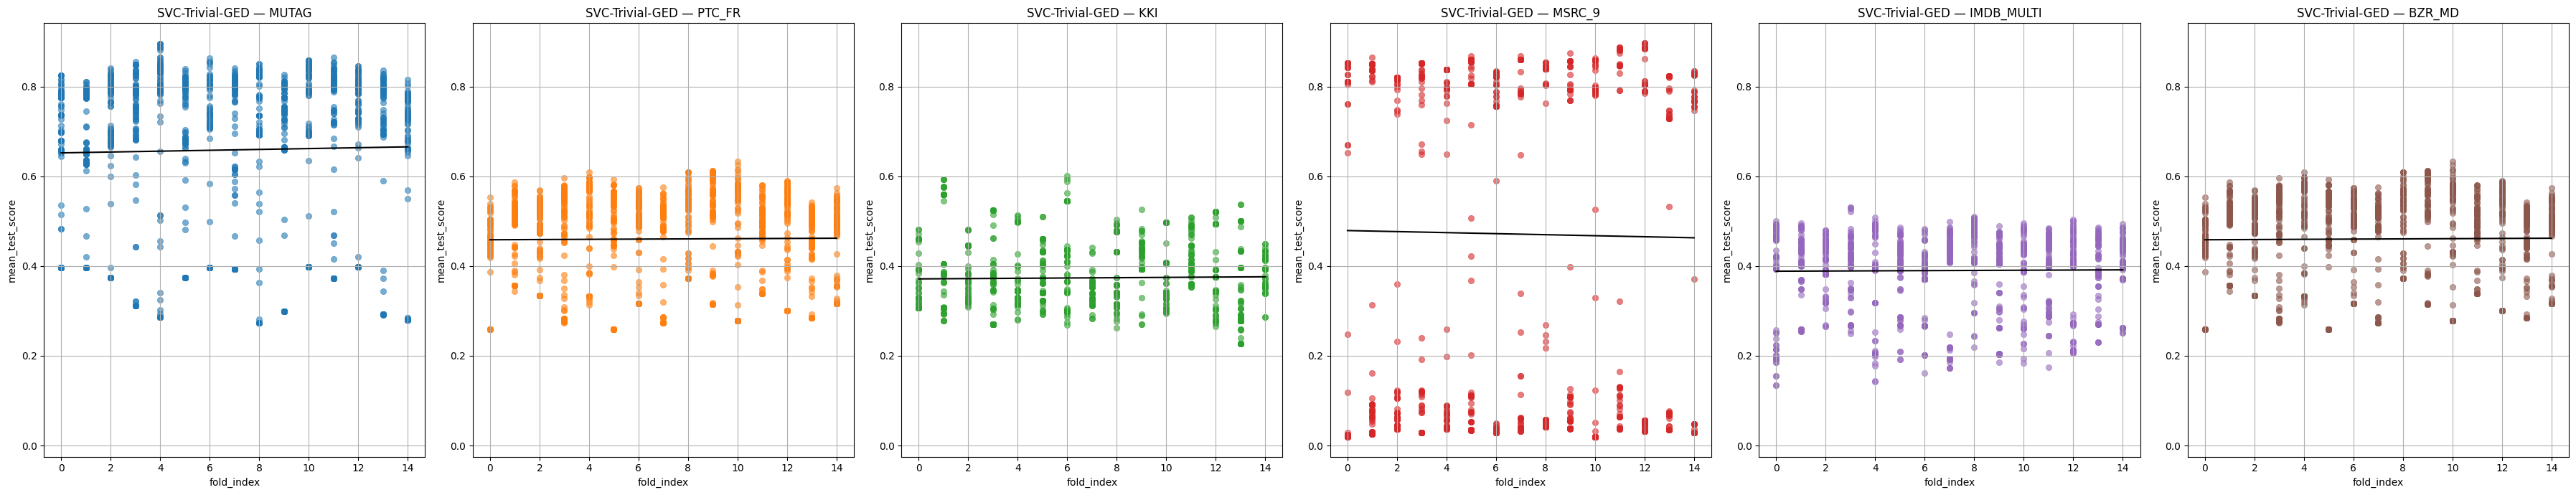

In [64]:
results_column = "mean_test_score"

collums = hyper_df.columns.tolist()
collums.remove(results_column)
collums.remove("params")
collums.remove("mean_fit_time")
collums.remove("mean_score_time")
collums.remove("std_fit_time")
collums.remove("std_score_time")
collums.remove("split0_test_score")
collums.remove("split1_test_score")
collums.remove("split2_test_score")
collums.remove("split3_test_score")
collums.remove("split4_test_score")
collums.remove("std_test_score")
collums.remove("rank_test_score")
# possible filter
# hyper_df = hyper_df[hyper_df["param_t_iterations"] == 4 ]
# hyper_df = hyper_df[hyper_df["param_diffusion_function"] == "von_Neumann_diff_kernel" ]
# for i, df in enumerate(dfs):
#     df =df[df["param_similarity_function"]=="k4"]
#     dfs[i] = df

# for i in range(15):
    # fold_df =hyper_df[hyper_df["fold_index"]==i]

# create a df with correlation results
# calculate correlations for each dataset (rows=hyperparameters, cols=datasets)
correlation_results = calculate_correlation(datasets_multiple, collums, results_column)

# keep per-dataset correlations and add summary columns
correlation_df = correlation_results.copy()
correlation_df['Mean_Correlation'] = correlation_df.mean(axis=1, skipna=True)
correlation_df['Mean_Absolute_Correlation'] = correlation_df.abs().mean(axis=1, skipna=True)

# sort by mean absolute correlation and expose hyperparameter as a column
correlation_df = correlation_df.sort_values(by='Mean_Absolute_Correlation', ascending=False).reset_index().rename(columns={'index': 'Hyperparameter'})
display(correlation_df)

# get the average scores for discrete hyperparameters
average_results = get_parameter_avergae(dfs, collums, results_column)
for hyperparameter, avg_dict in average_results.items():
    print(f"Hyperparameter: {hyperparameter}")
    for value, (mean, conf_int) in avg_dict.items():
        print(f"  Value: {value} => Mean: {mean:.4f}, 95% CI: ±{conf_int:.4f}")
    print()

for col in collums:
    if col != results_column:
        plot_hyperparameter_effect(dfs,filepaths_names, col, results_column, Model_Name)

In [65]:
display(hyper_df.sort_values(by='mean_test_score', ascending=False).head(30))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel_type,param_llambda,param_similarity_function,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
345,1.520545,0.014919,0.677226,0.001900,0.010346,NaN,precomputed,2.636664,k1,"{'C': 0.010345630260254, 'class_weight': None,...",0.929167,0.429167,0.341667,0.545833,0.412500,0.531667,0.209291,1,3
349,1.529099,0.005257,0.681323,0.001193,0.002763,balanced,precomputed,2.957201,k1,"{'C': 0.002763126776767086, 'class_weight': 'b...",0.925000,0.429167,0.341667,0.545833,0.412500,0.530833,0.207709,2,3
363,1.473914,0.014167,0.675095,0.002711,0.212890,NaN,precomputed,2.428161,k1,"{'C': 0.21289013892678493, 'class_weight': Non...",0.925000,0.429167,0.329167,0.545833,0.412500,0.528333,0.210033,3,3
331,1.522563,0.015149,0.679529,0.002327,0.009015,NaN,precomputed,2.318452,k1,"{'C': 0.009015444474760792, 'class_weight': No...",0.875000,0.429167,0.341667,0.545833,0.412500,0.520833,0.188838,4,3
831,2.069996,0.026715,0.976778,0.001578,9.493440,balanced,precomputed,0.017937,k4,"{'C': 9.493440087549587, 'class_weight': 'bala...",0.320833,0.354167,0.654167,0.616667,0.604167,0.510000,0.142195,1,8
484,0.757867,0.003269,0.331652,0.001564,0.006136,balanced,precomputed,1.010669,k2,"{'C': 0.006135843328540377, 'class_weight': 'b...",0.391667,0.400000,0.600000,0.595833,0.554167,0.508333,0.093281,1,4
890,1.115279,0.011570,0.518785,0.015635,0.001120,NaN,precomputed,0.018119,k4,"{'C': 0.0011196120158895727, 'class_weight': N...",0.320833,0.354167,0.641667,0.616667,0.604167,0.507500,0.139727,2,8
878,2.080149,0.047357,0.982331,0.003760,0.039729,NaN,precomputed,0.019312,k4,"{'C': 0.03972877186720087, 'class_weight': Non...",0.320833,0.354167,0.641667,0.616667,0.604167,0.507500,0.139727,2,8
865,2.084630,0.014118,0.982328,0.002842,1.722432,NaN,precomputed,0.021166,k4,"{'C': 1.7224320627189962, 'class_weight': None...",0.320833,0.362500,0.645833,0.608333,0.595833,0.506667,0.136361,4,8
1258,0.758019,0.004582,0.332982,0.001336,2.418107,balanced,precomputed,0.335893,k2,"{'C': 2.418107294722035, 'class_weight': 'bala...",0.416667,0.400000,0.608333,0.579167,0.512500,0.503333,0.083724,1,12
